In [1]:
import cv2
import numpy as np

In [2]:
from data_provider import DataProvider

In [16]:
df = DataProvider('ballsandhands.zip').get_video('3-j9-corridor')

In [17]:
df.head()

,file_name,right_hand_x,right_hand_y,left_hand_x,left_hand_y,ball_1_x,ball_1_y,ball_2_x,ball_2_y,ball_3_x,ball_3_y,photo
0,3-j9-corridor-001.png,122,187,138,59,124,183,113,64,137,57,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,3-j9-corridor-002.png,126,179,142,68,143,69,113,74,132,179,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,3-j9-corridor-003.png,136,166,151,93,136,165,113,84,154,90,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,3-j9-corridor-004.png,133,152,157,114,162,110,137,148,114,97,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,3-j9-corridor-005.png,131,150,161,148,112,114,140,139,167,145,<PIL.PngImagePlugin.PngImageFile image mode=RG...


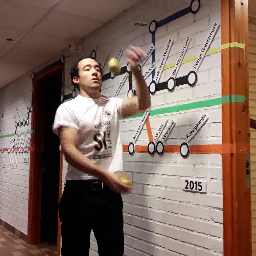

In [18]:
df.iloc[0, -1]

In [19]:
video = cv2.VideoWriter(df.iloc[0, 0][:-4] + '.avi', 0, 25, df.iloc[0, -1].size)

In [20]:
for _, frame_row in df.iterrows():
    frame = np.array(frame_row[-1])
    frame[frame_row[2]-5:frame_row[2]+5, frame_row[1]-5:frame_row[1]+5, 0] = 255
    frame[frame_row[4]-5:frame_row[4]+5, frame_row[3]-5:frame_row[3]+5, 1] = 255
    frame[frame_row[6]-5:frame_row[6]+5, frame_row[5]-5:frame_row[5]+5, 2] = 255
    video.write(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [21]:
video.release()